## Sales Analysis
<br>

#### **This project utilizes the powers of Python to perform different data analysis tasks, in this case, sales analysis. It covers a wide variety of data analysis methods for inspecting, filtering and analyzing data, encompassing the core aspects of data analysis, from simple data filtering techniques to data visualization.**

<br>

**The data being analyzed here are taken from Kaggle.com, a popular website for finding and publishing datasets. You can easily access it by clicking [here](https://www.kaggle.com/datasets/knightbearr/sales-product-data). The dataset consists of real-world sales data representing a one-year worth of product sales of an electronics store, broken down and organized into 12 csv files, each file representing the sales record of a particular month.**
<br>
<br>

**The dataset is comprised of hundreds of thousands of electronics store purchases broken down by product type, prices, order date, purchase address, etc., corresponding to the following coloumns:** <br> 
<br>

| **Column**             | **Description**                                                |
| :----------------------| :--------------------------------------------------------------|
| **Order ID**           | Unique IDs that are used to track orders.                      |
| **Product**            | Names of the products.                                         |
| **Quantity Ordered**   | Total quantity ordered of a particular item.                   |
| **Price Each**         | Prices of the products ordered.                                |
| **Order Date**         | Dates and time at which a customer made an order.              |
| **Purchase Address**   | Addresses the orders were delivered to.                        |

<br>

**The aim of this project is to demonstrate the data analysis skills I've learned thus far and to apply them to real-world scenarios. As such, this project asks and answers real-world questions about real-world sales data. For instance, "What was the best month for sales?", or, "Which time of the day should we display advertisements to maximize the likelihood of customers' purchasing products?"**


<br>
<br>



In [ ]:
#If you're using the executable notebook version, please run this cell first 
#to install the necessary Python libraries for the task 
!pip install pandas 
!pip install numpy 
!pip install matplotlib
!pip install pathlib


In [2]:
#Importing the Python libraries to be used 
import pandas as pd 
import pathlib 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")


### Part One: Reading and Inspecting Files


**1. Loading, reading, and joining files**

In [3]:
#specifying the path for all the csv files in the folder and loading each file 
files = pathlib.Path().rglob('*.csv')

#joining all the 12 files into one dataframe (to represent the annual sales)
df_all_months = pd.concat([pd.read_csv(file) for file in files])


**2. Inspecting the Dataframe**

In [4]:
#Inspecting the shape (rows x coloumns) of the dataframe 
shape = df_all_months.shape
print('Number of coloumns:', shape[1])
print('Number of rows:', shape[0])


Number of coloumns: 6
Number of rows: 186850


In [5]:
#Inspecting the coloumn headers of the dataframe
print('Coloumn headers in the dataset:')
for column in list(df_all_months.columns):
    print(column)


Coloumn headers in the dataset:
Order ID
Product
Quantity Ordered
Price Each
Order Date
Purchase Address


In [6]:
#Displaying the first 10 entries in the dataframe
print('The first 10 entries in the dataset:')
df_all_months.head(10)


The first 10 entries in the dataset:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


**3. Writing a New Excel File**

In [7]:
#creating and storing all sales data from all months into a new Excel file, 'All Sales.xlsx'
df_all_months.to_excel('All Sales.xlsx',            #specifying the file name
                      sheet_name='Sales 2019',      #specifying the sheet name
                      index=False)                  #removing unnecessary index coloumn


In [8]:
#Loading and previewing data from the new file
#creating a new dataframe, 'df', with the accumulated data in the file 'All Sales.xlsx'
df = pd.read_excel('All Sales.xlsx')

#to preview the first 5 entries of the new dataframe 
print('First 5 entries in \'All Sales.xlsx\' file:')
df.head()


First 5 entries in 'All Sales.xlsx' file:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Part Two: Updating and Cleaning the Data

<br> 

Some of the data contain missing entries, inappropriate values (such as repeating coloumn headers), or NaN (Not a Number) values. Further, some of the data types don't match their values given that the data were converted from csv file format to Excel file format. It's time to take care of these faulty entries and clean up the dataframe before moving forwards such that our analysis can proceed appripriately. 
<br>
<br>

**1. Removing NaN Entries**

In [9]:
#checking the number of entries before cleaning up 
print('Number of entries before cleaning up:', len(df))

#dropping NaN entries 
df.dropna(how='all', inplace=True)

#checking the number of entries after cleaning up 
print('Number of entries after cleaning up:', len(df))


Number of entries before cleaning up: 186850
Number of entries after cleaning up: 186305


**2. Converting Data to Appropriate Data Types**
<br>
Given that we switched from csv file format to Excel format, we need to make sure that all the numerical data in the file are indeed of the numeric type <br> (rather than being considered as text data).
<br>

In [10]:
#checking the data types of the coloumns with numeric values before converting
print('Data type of coloumns before converting:')
print(df[['Order ID', 'Quantity Ordered', 'Price Each']].dtypes) 
print('')


#converting the data in the 3 coloumns: 'Order ID', 'Quantity Ordered', & 'Price Each' to numeric-type data 
cols = ['Order ID', 'Quantity Ordered', 'Price Each']          #the coloumns to convert 

df[cols] = df[cols].apply(pd.to_numeric, 
                        errors='coerce')        #inappropriate values (including repeating headers) that can't be converted to numerical will be converted to NaN instead


#to remove the new NaN values 
df.dropna(how='any', inplace=True)       


#specifying the numeric type (integer, float, etc.) of numeric data
df[cols] = df[cols].astype({'Order ID': 'int32', 'Quantity Ordered': 'int32', 'Price Each': 'float32'})


#checking the data types of the coloumns after converting
print('Data type of coloumns after converting:')
print(df[cols].dtypes)


Data type of coloumns before converting:
Order ID            object
Quantity Ordered    object
Price Each          object
dtype: object

Data type of coloumns after converting:
Order ID              int32
Quantity Ordered      int32
Price Each          float32
dtype: object


**2.2. Coverting the Datetime Entries to Datetime-type Data**

In [11]:
#converting the data in the 'Order Date' coloumn to datetime-type data 
df['Order Date'] = pd.to_datetime(df['Order Date'], 
            format='%m/%d/%y %H:%M', errors='coerce').dt.strftime('%d/%m/%y %H:%M')       #to change the format of the datetime (to day/month/year)


#previewing the first entries off the 'Order Date' coloumn
print('Order dates after converting:')
df['Order Date'].head()
      

Order dates after converting:


0    19/04/19 08:46
2    07/04/19 22:30
3    12/04/19 14:38
4    12/04/19 14:38
5    30/04/19 09:27
Name: Order Date, dtype: object

**3. Updating the Excel File**

In [12]:
#overwriting the Excel file, 'All Sales.xlsx', with the updated/cleaned up dataframe 
df.to_excel('All Sales.xlsx', sheet_name='Sales 2019', index=False)


In [13]:
#now we can load and use a clean dataframe 
df = pd.read_excel('All Sales.xlsx')


### Part Three: Exploring the Data 
<br>
This part will consist of different real-world business questions and ways to answer these questions using Python's data analysis libraries and tools.
<br>
<br>

**Question 1: What was the best month for sales? How much was earned that month?**
<br>

To answer this question, first, we need to extract only the months from the 'Order Date' coloumn and store each separately in a new coloumn, 'Months'. Second, we need to get the total sales amounts per order by multiplying the quantity ordered with the price of each individual product, and creating and storing the results in a 'Sales' coloumn. Finally, I will group the data by month, calculate the total sum of sales per month, and, lastly, visualize the data to get a better view of how sales changed from one month to the next.

<br>

In [14]:
#First, adding a months coloumn
Months_col = pd.to_datetime(df['Order Date']).dt.month_name().str[:3]        #creating a months coloumn (by month abbreviations)
df.insert(loc=5, column='Months', value=Months_col)              #inserting the months coloumn into the dataframe 

#Second, adding a sales coloumn 
Sales_col = df['Quantity Ordered'] * df['Price Each']
df.insert(loc=4, column='Sales', value=Sales_col)

#previewing the first 5 entries of the dataframe to see if 'Months' and 'Sales' were added
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Months,Purchase Address
0,176558,USB-C Charging Cable,2,11.950000,23.900000,19/04/19 08:46,Apr,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.989998,99.989998,07/04/19 22:30,Jul,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.000000,600.000000,12/04/19 14:38,Dec,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.990000,11.990000,12/04/19 14:38,Dec,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.990000,11.990000,30/04/19 09:27,Apr,"333 8th St, Los Angeles, CA 90001"


In [15]:
#Third, grouping the data by month and calculating the total sales (and quantities) amount for each month
sales_per_month = df.groupby(['Months']).sum()[['Quantity Ordered', 'Sales']]

#sorting the data in alphabetical order by month name
#specifying the sorting order 
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#sorting the data
sales_per_month = sales_per_month.reindex(sort_order)

#to present the sales in USD and display them in a reader-friendly manner
sales_per_month_USD = sales_per_month.copy()
sales_per_month_USD['Sales'] = sales_per_month_USD['Sales'].apply(lambda sale: '${:,.2f}'.format(sale))

#displaying the results 
print('The following table displays the total sales amount (and quantities ordered) for each month:')
sales_per_month_USD


The following table displays the total sales amount (and quantities ordered) for each month:


,Quantity Ordered,Sales
Months,,
Jan,13595,"$2,286,906.12"
Feb,14729,"$2,394,466.92"
Mar,16930,"$2,793,085.43"
Apr,19150,"$3,229,765.32"
May,18338,"$3,033,275.76"
Jun,15911,"$2,684,602.51"
Jul,16613,"$2,721,872.58"
Aug,15101,"$2,447,041.56"
Sep,14709,"$2,413,750.81"


In [16]:
#Now we can extract the month with the most sales
sales_per_month_sorted = sales_per_month.sort_values(by='Sales', ascending=False)
best_month = sales_per_month_sorted.index[0]

#getting month full name 
best_month = pd.to_datetime(best_month, format='%b').month_name()

#reporting the best month for sales 
print('The best month for sales was:', best_month)


The best month for sales was: December


In [17]:
#How much was earned that month?
maxsale = sales_per_month_sorted['Sales'].iloc[0]
print('The total sales amount earned that month was: ${:,.2f}'.format(maxsale))


The total sales amount earned that month was: $3,925,406.82


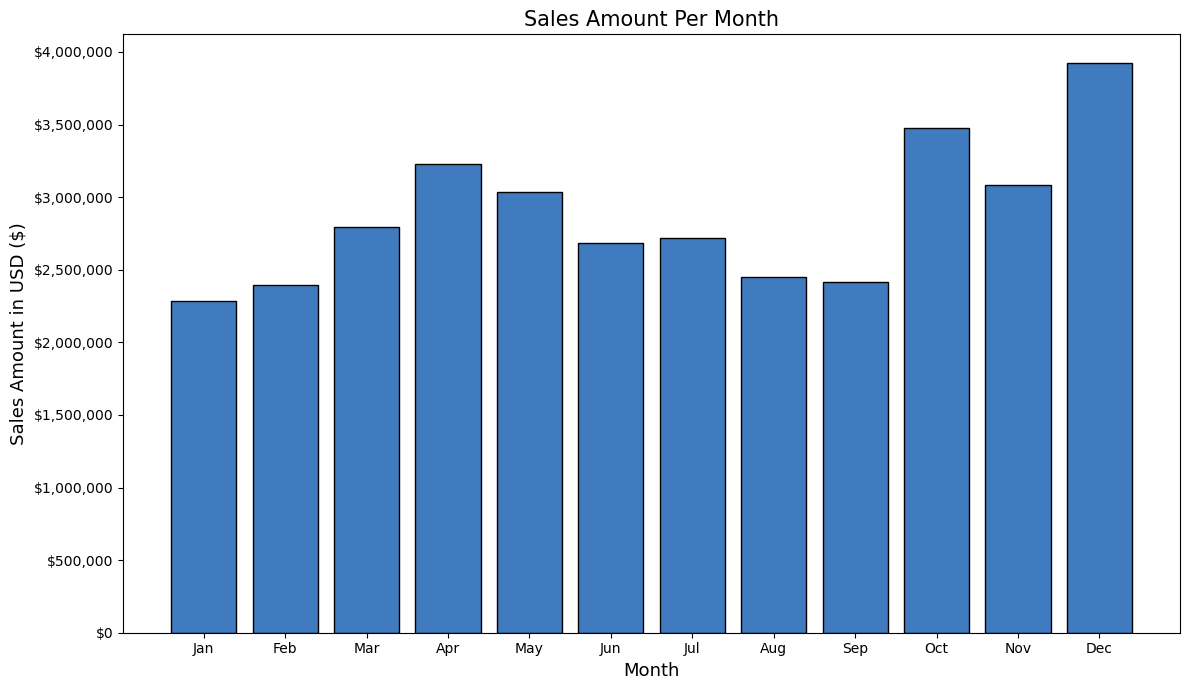

In [18]:
#Finally, we can also visualize the amount of sales per month using a bar chart
months = sales_per_month.index.values 
sales = sales_per_month['Sales']

#specifying the figure size 
plt.figure(figsize=(12,7))        # (width x height)

#plotting a bar chart
plt.bar(months, sales,
        color='#407bbf',          
        linewidth=1,
        edgecolor='k')

#adding a title 
plt.title('Sales Amount Per Month', fontsize=15)

#adding labels to the axes 
plt.xlabel('Month', fontsize=13)
plt.ylabel('Sales Amount in USD ($)', fontsize=13)

#adjusting the y-axis to display the sales amounts accurately 
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

#displaying the bar chart 
plt.tight_layout()
plt.show()


**Question 2: Which city sold the most products?**
<br>

To compare cities, first we'll have to extract the city corresponding to each order from the 'Purchase Address' coloumn and store them in a <br> separate coloumn 'City'. Thereafter we can group the data by city and calculate the total sum of sales for each city separately.
<br>
<br>

In [19]:
#Defining a function for extracting city (and state) from 'Purchase Address' coloumn
def get_city_state(address):
        address = address.split(', ') 
        city = address[1]
        state = address[2][0:2]
        return "{} ({})".format(city, state)

#Adding a city coloumn
city_col = df['Purchase Address'].apply(lambda add: get_city_state(add))
df.insert(loc=8, column='City', value=city_col)


#Grouping the data by city and calculating the total sales amount for each city
sales_per_city = df.groupby(['City']).sum()['Sales']

#formating sales to present them in USD
sales_per_city_USD = sales_per_city.apply(lambda sale: '${:,.2f}'.format(sale)).to_frame(name='Total Sales Amount')


#displaying the results 
print('The following table displays the total sales amount for each city:')
sales_per_city_USD


The following table displays the total sales amount for each city:


,Total Sales Amount
City,
Atlanta (GA),"$2,795,498.57"
Austin (TX),"$1,819,581.74"
Boston (MA),"$3,661,641.99"
Dallas (TX),"$2,767,975.39"
Los Angeles (CA),"$5,452,570.77"
New York City (NY),"$4,664,317.41"
Portland (ME),"$449,758.27"
Portland (OR),"$1,870,732.33"
San Francisco (CA),"$8,262,203.87"


In [20]:
#now we can extract the city associated with the highest sales amount
sales_per_city_sorted = sales_per_city.sort_values(ascending=False)
best_city = sales_per_city_sorted.index[0]

#reporting the city with most sales 
print('The city that sold the most products is:', best_city)


The city that sold the most products is: San Francisco (CA)


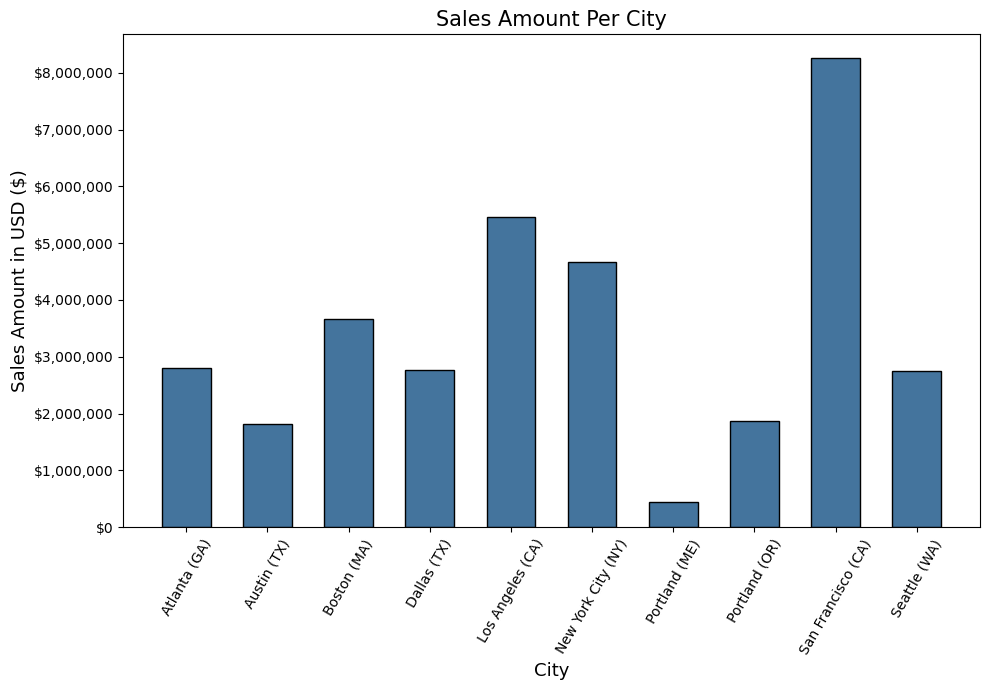

In [21]:
#Finally, we can once again visualize the data using the bar chart to get a better view of the sales per city
#specifying the city names 
cities = sales_per_city.index.values 

#setting the figure size 
plt.figure(figsize=(10,7))

#plotting a bar chart 
plt.bar(cities, sales_per_city,
        color='#44749d',
        width=0.6,
        linewidth=1,
        edgecolor='k')

#adding a title 
plt.title('Sales Amount Per City', fontsize=15)

#adding labels to the axes 
plt.xlabel('City', fontsize=13)
plt.ylabel('Sales Amount in USD ($)', fontsize=13)

#adjusting the rotation of the x-axis' labels 
plt.xticks(rotation=60)

#adjusting the y-axis to display the sales amounts accurately 
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

#displaying the bar chart 
plt.tight_layout()
plt.show()


**Question 3: Which product sold the most? And why do you think it sold the most?**
<br>

To answer this question, we would have to group the data based on product purchases and then calculate the total amount of quantities ordered for each product to determine which one sold the most amount of quantities.
<br>
<br>

In [22]:
#Grouping data by product names and calculating the total quantity ordered for a given product
products_sold = df.groupby(['Product']).sum()['Quantity Ordered']

#sorting the data in descending order to determine the product that sold the most
products_sold = products_sold.sort_values(ascending=False)
most_sold_product = products_sold.index[0]

#reporting the product  
print('The product that was sold the most is:', most_sold_product)


The product that was sold the most is: AAA Batteries (4-pack)


**Why did it sell the most?**
<br>

Generally, batteries are very commonly used with a variety everyday electronic devices, are cheap, and tend to be short-lived compared to most, or all, electronic products in this dataset. Further, AAA batteries are non-rechargeable. Therefore, taken together, these factors predict that batteries are much more likely to be demanded heavily compared to other electronic products. 
<br>
<br>

**Question 4: Is there a relationship between how much a product costs and the quantity sold?**
<br>

One way to answer this question is to create a dual-axis line chart displaying the prices of each product and the quantity sold in order to compare them. <br> First, we will have to create two groups, the first representing the prices of each product, the second representing the total quantity sold for each product.
<br>
<br>

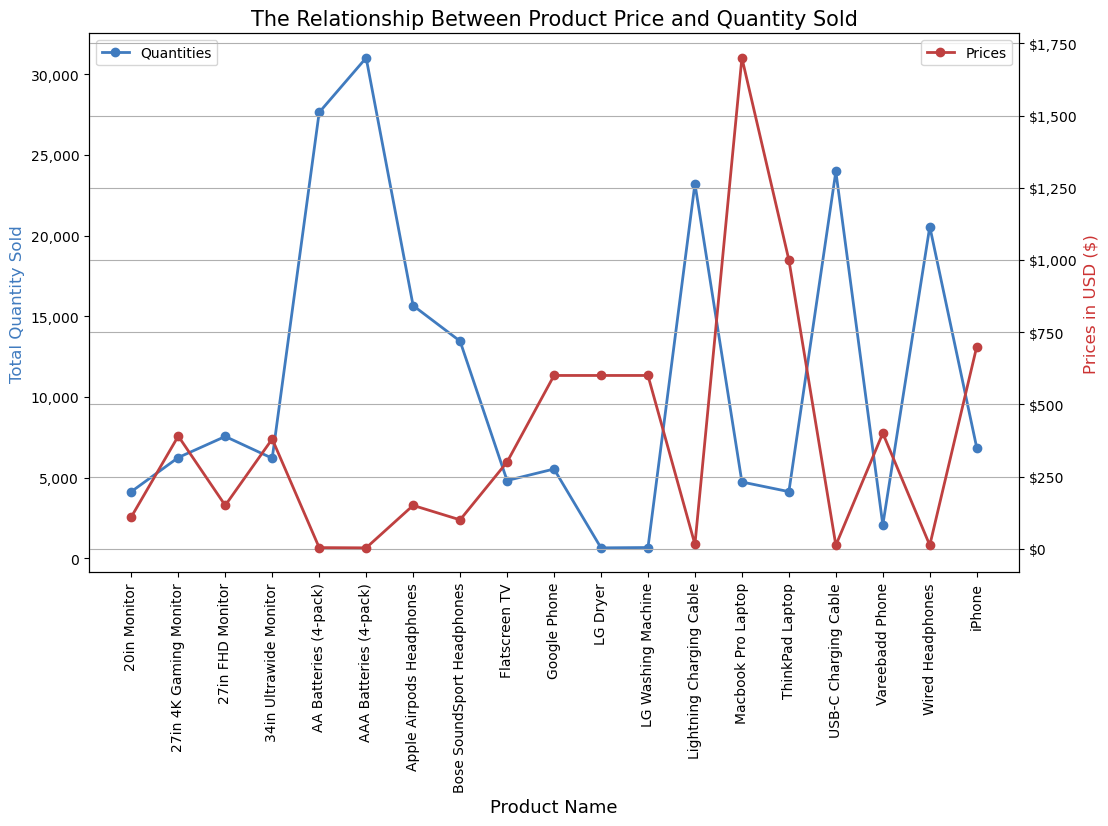

In [23]:
#Creating the first group for quantity sold per product
products_quantity = df.groupby(['Product']).sum()['Quantity Ordered']

#extracting the product names 
products = products_quantity.index.values

#creating the second group for price per product
products_prices = df.groupby(['Product'])['Price Each'].apply(lambda price: float(np.unique(price)))


#Now, creating a subplot to compare product prices to sold quantities 
fig, ax1 = plt.subplots(figsize=(12,7))

#plottin the data for total sum of quantity sold of each product  
ax1.plot(products, products_quantity,          #specifying the data to plot
        marker='o',        #setting marker shape 
        c='#407bbf',       #setting the line color
        lw=2,              #setting the line width
        label='Quantities')          #labeling the line plot


#plotting the data for the prices of each product
ax2 = ax1.twinx()
ax2.plot(products, products_prices,
        marker='o',
        c='#bf4040',
        lw=2,
        label='Prices')


#Adding a title
ax1.set_title('The Relationship Between Product Price and Quantity Sold', fontsize=15)

#labeling the x-axis
ax1.set_xlabel('Product Name', fontsize=13)

#labeling first y-axis
ax1.set_ylabel('Total Quantity Sold', fontsize=12, color='#407bbf')

#labeling second y-axis 
ax2.set_ylabel('Prices in USD ($)', fontsize=12, color='#cc3333')

#adjusting the rotation of the x-axis' labels
ax1.set_xticklabels(products, rotation='vertical')

#adjusting the y-axis to make numeric values reader-friendly
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

#adding a legend 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#adding a grid 
plt.grid()

#displaying the line plot 
plt.show()


**What can we conclude from the chart?**
<br>

As the line chart illustrates, the lower the price of a product, the higher the quantity sold of that product, as in the case of batteries products for instance. Meanwhile, the higher the product price, the lower the quantity sold, as in the case of laptops. Other than the obvious explanation that cheap products are more affordable by a larger population of customers, the trends in this dataset could be explained by the simple fact that highly priced products have higher longevity than low price products, which means highly priced products tend to be less replaceable, and  thus the customer doesn't need to purchase them frequently compared to the cheap but quickly exhaustible products.
<br>
<br>

**Question 5: Which products are most often sold together?**
<br>

For starters, we can filter data based on whether there are duplicates in the 'Order ID' coloumn, indicating that the same person made multiple product purchases, and then join the multiple products sold together and count the instances of particular products being sold together in order to extract those that most often ordered together. 
<br>
<br>

In [24]:
#First, filtering data for Order ID duplicates 
order_filter = df['Order ID'].duplicated(keep=False) 

#extracting and storing orders with more than one purchase into a dataframe
df_multiple_orders = df[order_filter][['Order ID', 'Product']]         #storing only the relevant coloumns: 'Order ID' and 'Product'

#grouping data by Order ID and joining multiple products purchased by same person into one coloumn (/Series object)
orders_per_person = df_multiple_orders.groupby(['Order ID'])['Product'].transform(lambda product: ", ".join(product))
df_orders_per_person = orders_per_person.to_frame(name='Products Sold Together').reset_index(drop=True)        #again changing to table form


#previewing the first 5 entries of our joined orders coloumn 'orders_per_person'
print('Products purchased per order (first 5 entries):')
df_orders_per_person.head()


Products purchased per order (first 5 entries):


,Products Sold Together
0,"Google Phone, Wired Headphones"
1,"Google Phone, Wired Headphones"
2,"Google Phone, USB-C Charging Cable"
3,"Google Phone, USB-C Charging Cable"
4,"Bose SoundSport Headphones, Bose SoundSport He..."


In [25]:
#finally, to get the frequency of orders sold together 
orders_frequency = orders_per_person.value_counts()       #sorted in descending order
#to present the data in table form
df_orders_frequency = orders_frequency.to_frame(name='Frequency of products sold together')

#reporting the results 
print('The following table displays the frequency of products sold together:')
df_orders_frequency


The following table displays the frequency of products sold together:


,Frequency of products sold together
"iPhone, Lightning Charging Cable",1764
"Google Phone, USB-C Charging Cable",1712
"iPhone, Wired Headphones",722
"Vareebadd Phone, USB-C Charging Cable",624
"Google Phone, Wired Headphones",606
...,...
"34in Ultrawide Monitor, 20in Monitor",2
"20in Monitor, Flatscreen TV",2
"USB-C Charging Cable, LG Dryer",2
"ThinkPad Laptop, Vareebadd Phone",2


In [26]:
#reporting the products sold together most often 
most_sold_together = orders_frequency.index[0]
print('The two products sold together the most often are: {}'.format(' and '.join(most_sold_together.split(', '))))


The two products sold together the most often are: iPhone and Lightning Charging Cable


**Question 6: Which time of the day should we display advertisments to maximize the likelihood of customer's purchasing products?**
<br>

One way to answer this question is to extract the time of the day from the 'Order Date' coloumn, and then grouping the data based on the time of <br> the day (hour) in which a product was purchased to determine which times are associated with the most product purchases.
<br>
<br>

In [27]:
#First, extracting time of purchase and storing it in a new coloumn, 'Time of Purchase' 
Time_col = pd.to_datetime(df['Order Date'], format='%d/%m/%y %H:%M').dt.strftime('%I %p')       #creating a time coloumn (by 'hour' of purchase)

#adding a 'Time of Purchase' coloumn to the dataframe 
df.insert(loc=6, column='Time of Purchase', value=Time_col)              #inserting the time coloumn into the dataframe 


#second, grouping the data by time of purchase and calculating the total sum of quantities 
#sold for each hour of the day 
purchases_per_hour = df.groupby(['Time of Purchase']).sum()['Quantity Ordered']

#rearranging the order
time_sort_order = ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', '08 AM', '09 AM', '10 AM', '11 AM', 
                   '12 PM', '01 PM', '02 PM', '03 PM', '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM']
purchases_per_hour = purchases_per_hour.reindex(time_sort_order)

#to present the data in table form 
df_purchases_per_hour = purchases_per_hour.to_frame(name='Total Quantity Sold')


#reporting the amounts of purchases made for each time of the day 
print('The following table displays the total sum of quantities ordered for each hour of the day:')
df_purchases_per_hour


The following table displays the total sum of quantities ordered for each hour of the day:


,Total Quantity Sold
Time of Purchase,
12 AM,4428
01 AM,2619
02 AM,1398
03 AM,928
04 AM,937
05 AM,1493
06 AM,2810
07 AM,4556
08 AM,7002


In [28]:
#Now we can extract the time of the day associated with most product purchases
#sorting the results in descending order
purchases_per_hour_sorted = purchases_per_hour.sort_values(ascending=False)

#extracting the best time for sales 
best_hour = purchases_per_hour_sorted.index[0]

#reporting the result
print('The best time of day for displaying advertisements is:', best_hour)


The best time of day for displaying advertisements is: 07 PM


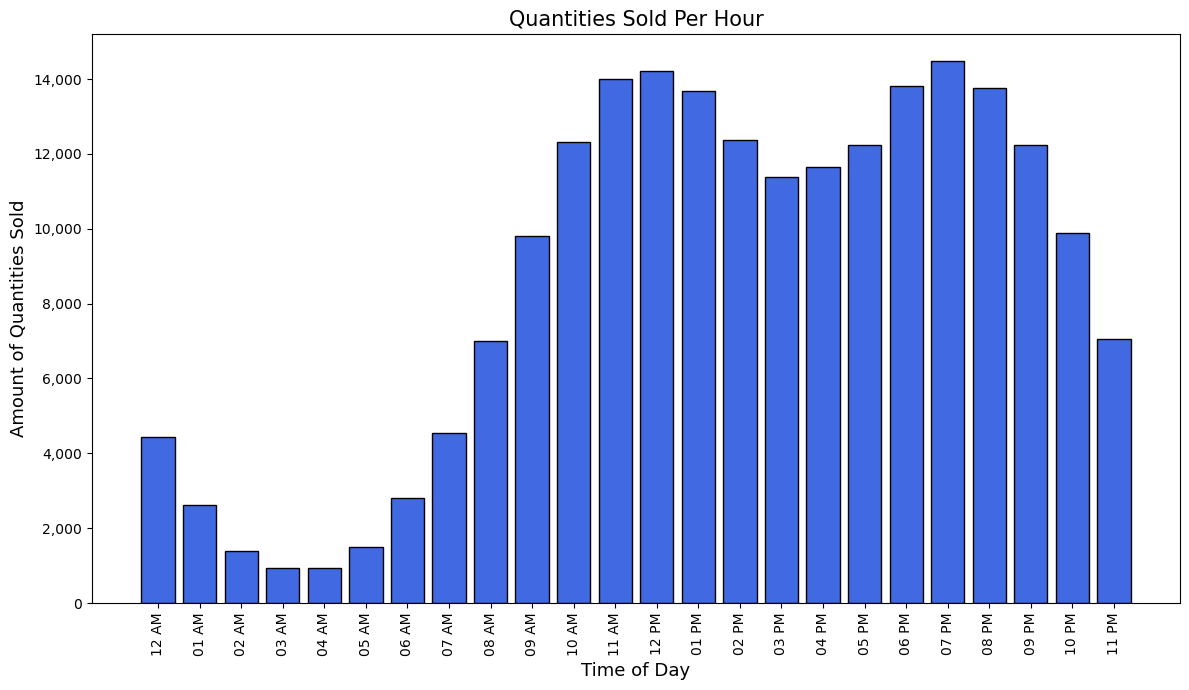

In [29]:
#finally, we can plot the data using a bar chart in order to get a better view  of how many purchases are made per hour
#extracting times of the day 
time_of_purchase = purchases_per_hour.index.values

#setting the figure size 
plt.figure(figsize=(12,7))

#creating a line plot
plt.bar(time_of_purchase,
        purchases_per_hour, 
        color='#4169e1',
        linewidth=1,
        edgecolor='k')

#adding a title
plt.title('Quantities Sold Per Hour', fontsize=15)
#adding labels to the axes
plt.xlabel('Time of Day', fontsize=13)
plt.ylabel('Amount of Quantities Sold', fontsize=13)

#adjusting the rotation of the x-axis' labels
plt.xticks(rotation=90)

#adjusting the y-axis to make quantities numeric values reader-friendly
plt.gcf().axes[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#displaying the bar chart
plt.tight_layout()
plt.show()


**What does the data tell us?**
<br>

As illustrated in the bar chart, it appears that the best time to display advertisements in order to increase product purchases and sales is in the evening (between 6 PM to 8 PM) and in the afternoon (between 11 AM to 1 PM). These are the time ranges associated with most product purchases.
<br>
<br>